#Лабораторная работа 2. Фабарисов Дмитрий. 2 курс АД

In [2]:
import cv2
import skimage.io as sk
import matplotlib.pyplot as plt
import numpy as np
import copy as cp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 0. Чтение картинки

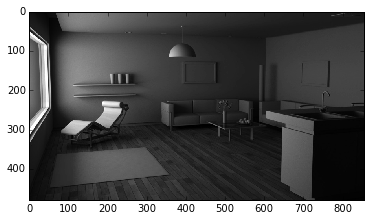

In [3]:
pic = cv2.imread('room.jpg')
gray_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

sk.imshow(gray_pic)

## 1. После считывания изображения в серых тонах посмотрим на гистограмму распределений

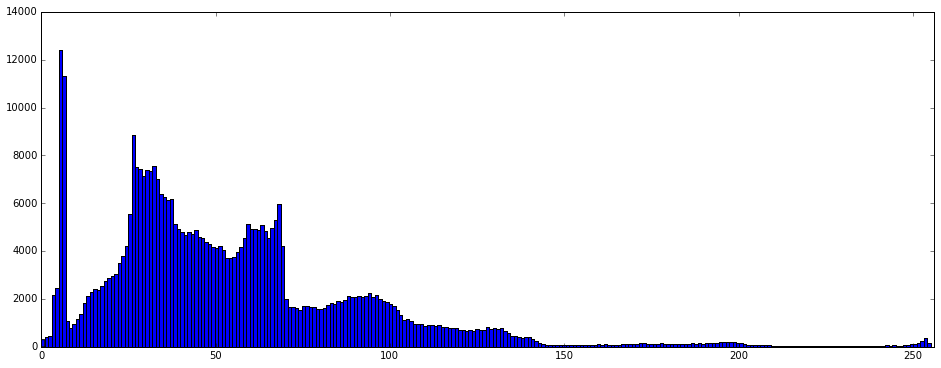

In [220]:
#hist = cv2.calcHist([gray_pic], [0], None, [256], [0,256])

figure(figsize = (16, 6))
plt.hist(gray_pic.ravel(), bins=256)
plt.xlim([0,256])
plt.show()

Мы получили всего лишь 145 значимых оттенков серого вместо возможных 256, а значит сделаем линейную коррекцию, выбирая $y_{min} = 0, y_{max} = 145$

## 2. Улучшение изображения линейной коррекцией

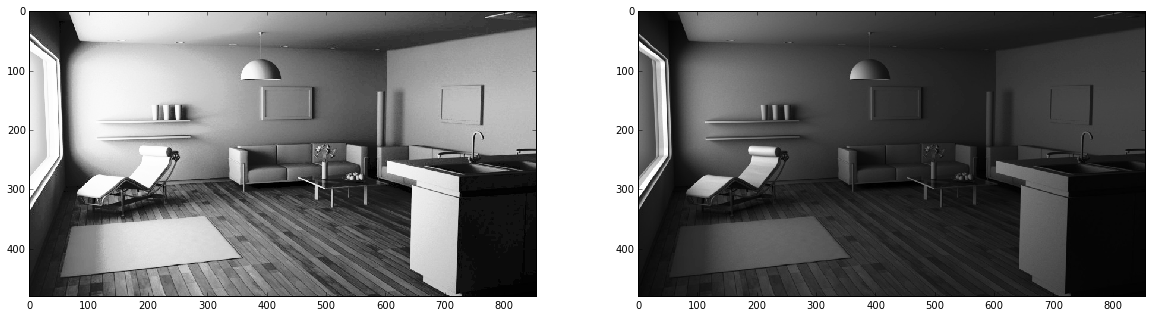

In [221]:
improved_pic = cv2.equalizeHist(gray_pic)
fig = figure(figsize = (20, 20))
fig.add_subplot(1, 2, 1)
skimage.io.imshow(improved_pic, cmap = 'gray')
fig.add_subplot(1, 2, 2)
skimage.io.imshow(gray_pic, cmap = 'gray')

In [240]:
def show_pic(pic_list, name = ['picture', 'picture'], figsize_ = (16, 10)):
    fig = figure(figsize = figsize_)
    for idx in range(len(pic_list)):
        subplot = fig.add_subplot(1, len(pic_list), idx+1)
        sk.imshow(pic_list[idx])
        subplot.set_title(name[idx])

####Изображение слева выглядит гораздо лучше, линейная коррекция исправила излишне темную картинку

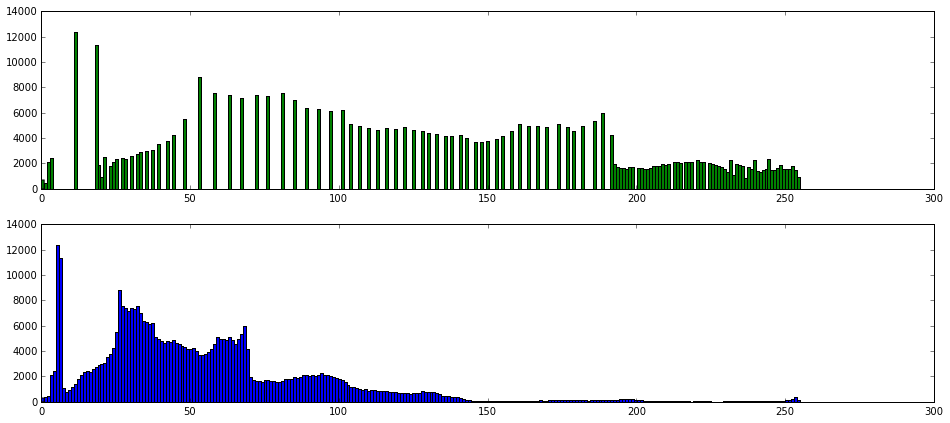

In [223]:
#hist = cv2.calcHist([improved_pic], [0], None, [256], [0,256])

fig = figure(figsize = (16, 7))
fig.add_subplot(2,1,1)
plt.hist(improved_pic.ravel(),256, color='g')
fig.add_subplot(2,1,2)
plt.hist(gray_pic.ravel(),256)
plt.show()

#####Как и ожидалось верхняя гистограмма представляет из себя растянутую по горизонтали часть нижней.

## 3. Гамма коррекция

In [224]:
#def gamma_correction(pic, gamma = 1, c = 1):
#    gamma_pic = c * pic**gamma
#    return gamma_pic

def gamma_correction(img, gamma = 1, c = 1):
    img = img/255.0
    img = img ** gamma * c
    return np.uint8(img*255)

####Будем сравнивать оригинал с полученным изображением в зависимости от $gamma \in [0.2;5]$ и $c \in [0.5;2]$. Оставим только те изображения которые лучше оригинала, а далее из них выберем лучшее. (ниже только лучшие варианты). Лучшый вариант $gamma = 0.65, c = 1$.

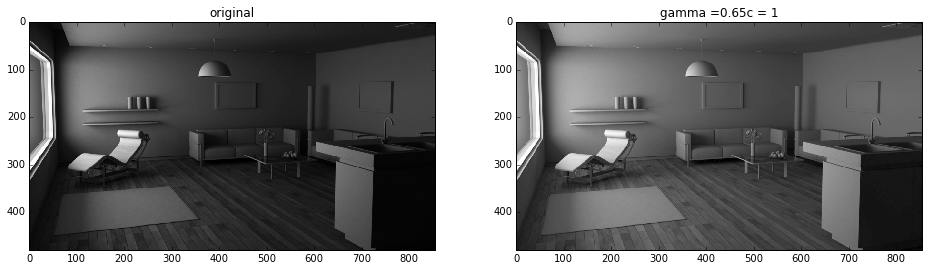

In [225]:
gamma = 0.65
c = 1
gamma_pic = gamma_correction(gray_pic, gamma, c)
show_pic([gray_pic, gamma_pic], ['original', 'gamma =' + str(gamma) + "c = " + str(c)], (16, 7))

##4. Добавление шумов

###Гауссовский

30.6089363987 -32.678253418


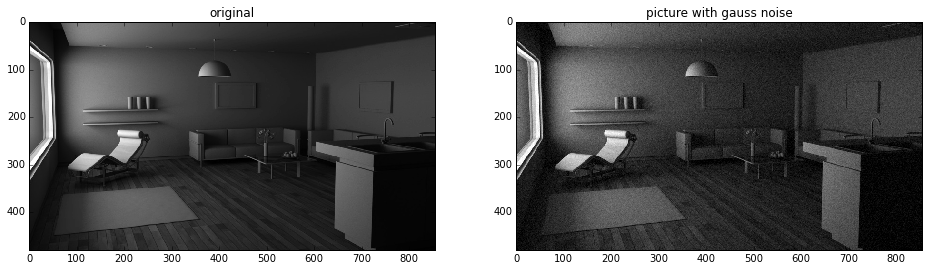

In [229]:
mu = 0
sigma = 7
height = gray_pic.shape[0]
width = gray_pic.shape[1]
gauss_noise = (np.random.normal(mu, sigma, height*width))
print max(gauss_noise), min(gauss_noise)
gauss_pic = gray_pic.ravel() + gauss_noise
for i in range(width*height):
    if gauss_pic[i] > 255.0:
        gauss_pic[i] = 255.0
    if gauss_pic[i] < 0.0:
        gauss_pic[i] = 0.0
gauss_pic = np.uint8(gauss_pic.reshape(height, width))
show_pic([gray_pic, gauss_pic], ['original', 'picture with gauss noise'])

### Соль и перец

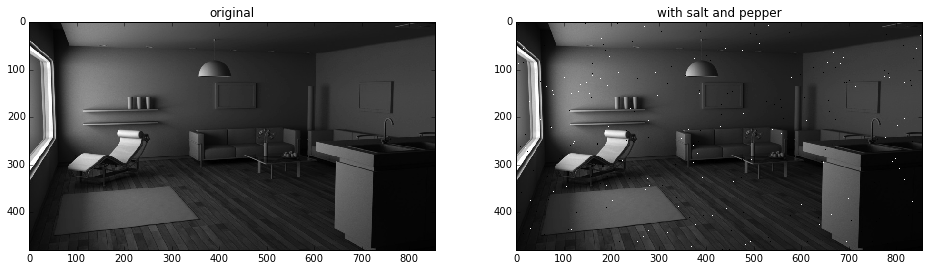

In [230]:
dots_number = 1000
dots = list()
for i in range(dots_number):
    dots.append(random.randint(0, height*width))
dot_pic = cp.deepcopy(gray_pic.ravel())
for i in range(len(dots)):
    if i % 2:
        dot_pic[dots[i]] = 255
    else:
        dot_pic[dots[i]] = 0
dot_pic = dot_pic.reshape(height, width)
show_pic([gray_pic, dot_pic], ['original', 'with salt and pepper'])

## 5. Исправление гауссового шума

####Окно нужно брать не слишком большим (иначе изображение сильно размывается) но и не слишком маленьким (почти нет эффекта). Сигма подбирается визуально. Как и ожидалось, она немного меньше дисперсии гауссового шума.

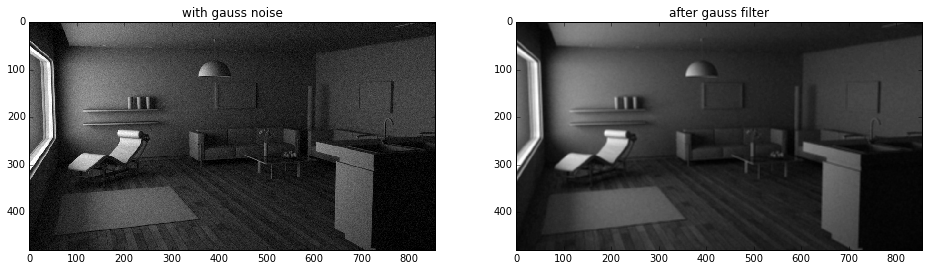

In [279]:
gauss_imp_pic = cv2.GaussianBlur(gauss_pic, (5,5), 4)
show_pic([gauss_pic, gauss_imp_pic], ['with gauss noise', 'after gauss filter'])

## 6. Исправление шума соль и перец

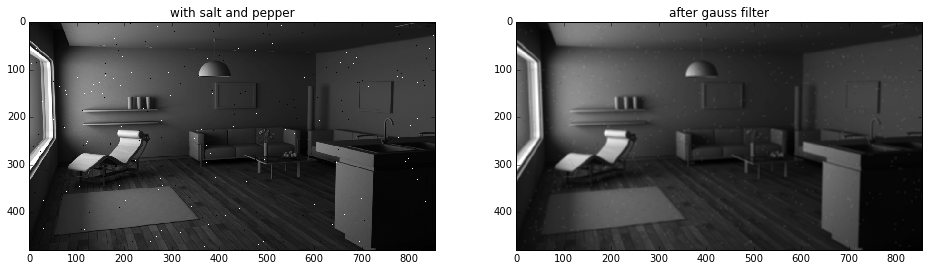

In [278]:
dot_imp_pic = cv2.GaussianBlur(dot_pic, (5,5), 4)
show_pic([dot_pic, dot_imp_pic], ['with salt and pepper', 'after gauss filter'])

#### Исправление шума соль и перец гауссовским фильтром оказалось довольно бесполезным занятием при любых параметрах. Поэтому применим медианный фильтр.

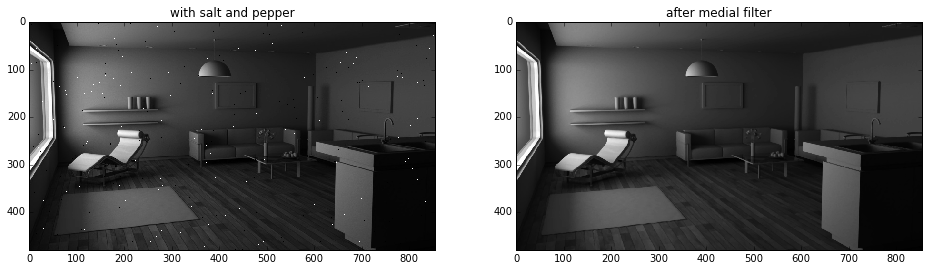

In [277]:
dot_imp_pic = cv2.medianBlur(dot_pic, 3)
show_pic([dot_pic, dot_imp_pic], ['with salt and pepper', 'after medial filter'])

####Выбор медианного фильтра с  небольшим параметром отлично помогает в данной ситуации

## 7. Поиск краев

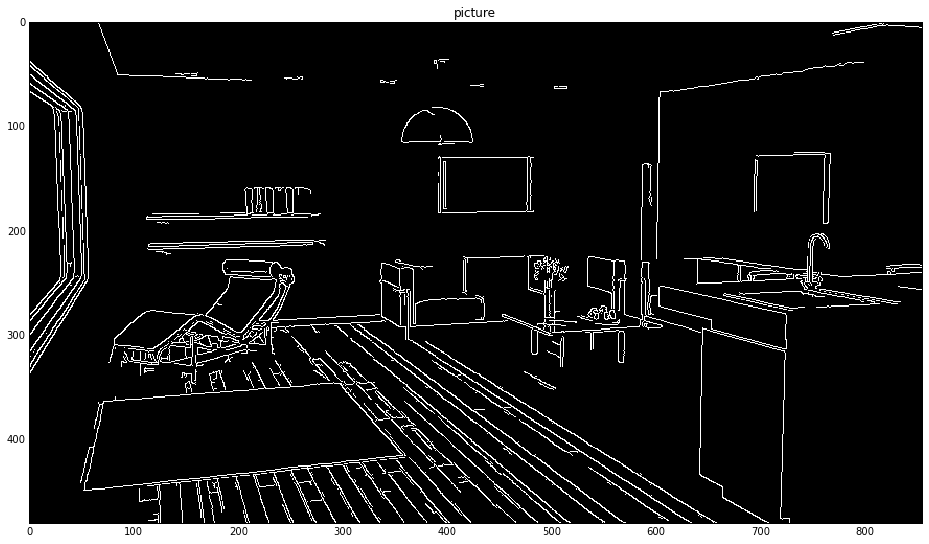

In [282]:
edge_pic = cv2.Canny(gray_pic, 30, 90)
show_pic([edge_pic])